<a href="https://colab.research.google.com/github/Amal-Baby-Mathews/Mega_ML/blob/main/LOF_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Data_ML/temperory_dataset.csv'

# Create a local Colab directory to save the file
local_path = '/content/Local_Data'
os.makedirs(local_path, exist_ok=True)  # Create directory if it doesn't exist

# Copy the file from the shared Drive directory to the local Colab environment
!cp "{file_path}" "{local_path}"

print(f"File copied to local Colab")

File copied to local Colab


In [4]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def read_csv_dataset(location, fieldnames, nrows=None):
    df = pd.read_csv(location, usecols=fieldnames, nrows=nrows)
    # Remove rows with 0, NA, or null values
    df = df.dropna(subset=fieldnames)
    #df = df[(df[fieldnames] != 0).all(axis=1)]
    return df

# Usage
fieldnames = ["be_stream2methane", "al_productgasoutlet_temp", "fl_inlet_flow", "be_ambient_tt_scaled_value", "be_carbonvesselinletflow_ft418", "be_scg_n2"]
dataset = read_csv_dataset(r"/content/Local_Data/temperory_dataset.csv", fieldnames)


In [6]:
# Split the dataset into training and testing sets
X_train = dataset.values[:300000, :]  # First 450,000 rows for training
X_test = dataset.values[-100000:]  # Remaining 50,000 rows for testing

# Train the LOF model
#clf = LocalOutlierFactor(n_neighbors=50, contamination=0.5)


In [7]:
print(len(dataset["be_stream2methane"]))
print(len(X_test))

464210
100000


In [12]:
import scipy.interpolate as interp
clf = LocalOutlierFactor(n_neighbors=50, contamination=0.005)
# Predict anomalies on the test set
y_pred = clf.fit_predict(X_train)

# Get the negative outlier factor for each sample
negative_outlier_factors = -clf.negative_outlier_factor_

# Ensure negative_outlier_factors has the same shape as X_test
# Inliers (normal data points)
inliers = X_train[y_pred == 1]

# Outliers (anomalous data points)
outliers = X_train[y_pred == -1]

# Further analysis of outliers based on all features
#print(outliers)



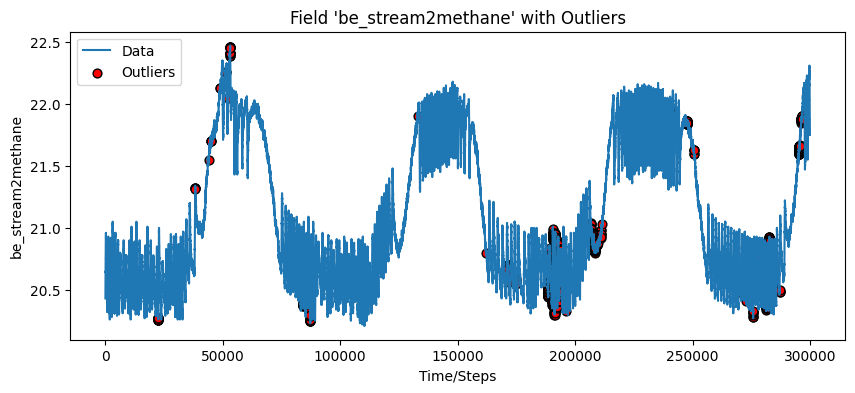

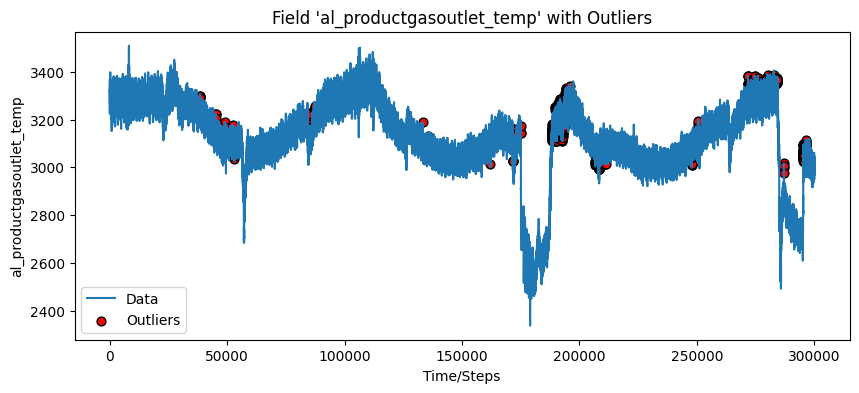

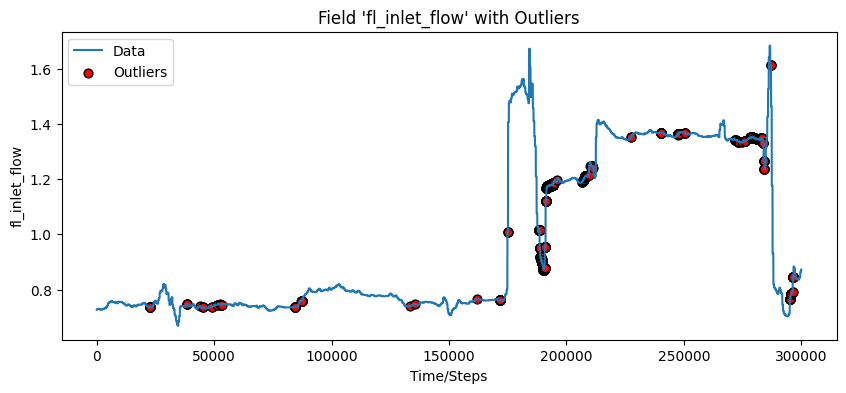

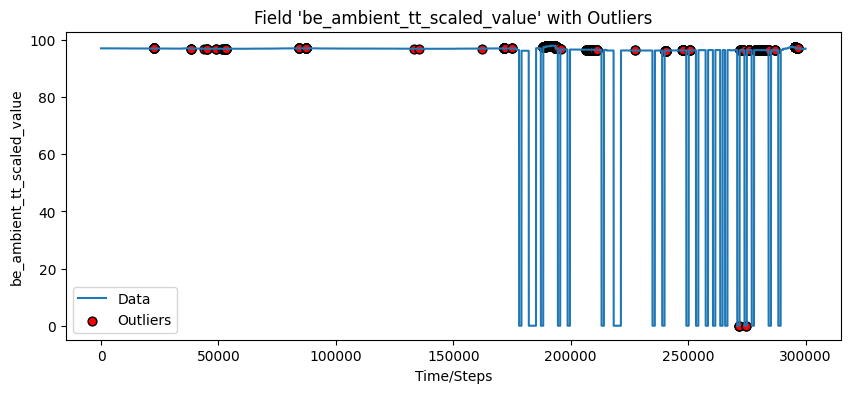

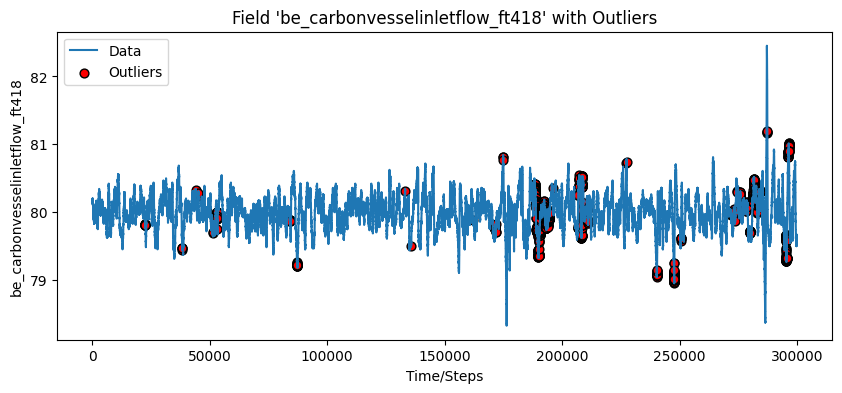

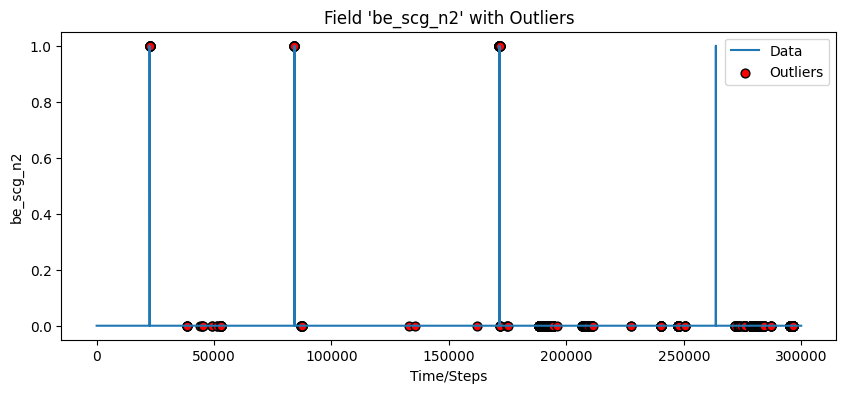

In [13]:
# Separate inliers and outliers
inliers_indices = np.where(y_pred == 1)[0]
outliers_indices = np.where(y_pred == -1)[0]

# Plot each field against steps/time, highlighting outliers
num_fields = X_train.shape[1]  # Assuming time/steps are in a separate column
for i in range(num_fields):
    plt.figure(figsize=(10, 4))
    plt.plot(X_train[:, i], label='Data')
    plt.scatter(outliers_indices, X_train[outliers_indices, i], c='red', edgecolor='k', s=40, label='Outliers')
    plt.xlabel('Time/Steps')
    plt.ylabel(fieldnames[i])
    plt.legend()
    plt.title(f"Field '{fieldnames[i]}' with Outliers")
    plt.show()